
## Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle]. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [3]:
import pandas as pd
train = pd.read_csv("C:/Users/chash/Downloads/gender_submission.csv")


## Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
train.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Basic Information about the Dataset

In [16]:
# Quick information
train.info()

# Basic statistics
train.describe()

# Value counts for important categorical columns

print(train['Survived'].value_counts())
print(train['PassengerId'].value_counts()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
Survived
0    266
1    152
Name: count, dtype: int64
PassengerId
892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: count, Length: 418, dtype: int64


## Udentifying Relationships and Trends


# Univariate Analysis 

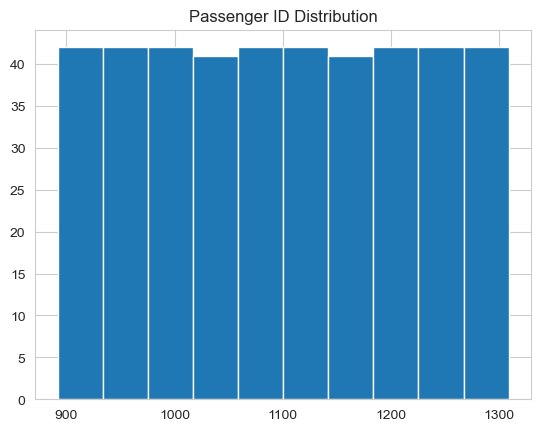

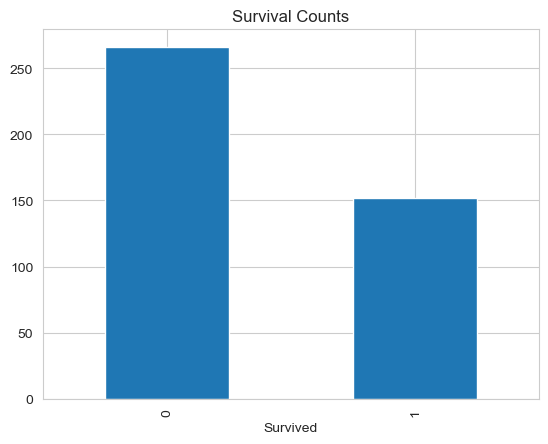

In [18]:
# Histogram for numeric values 
train['PassengerId'].hist()
plt.title('Passenger ID Distribution')
plt.show()

train['Survived'].value_counts().plot(kind='bar')
plt.title('Survival Counts')
plt.show()


# Boxplots to Check for the Otliers

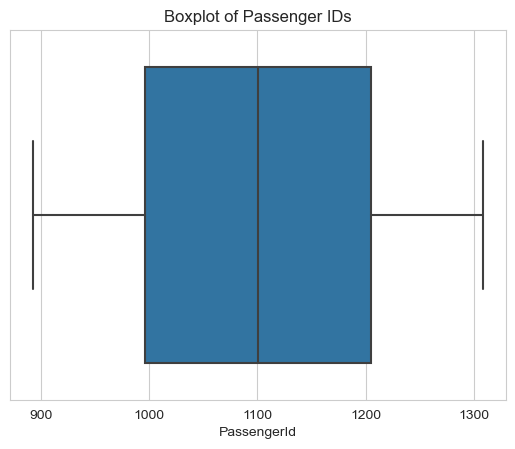

In [19]:
sns.boxplot(x=train['PassengerId'])
plt.title('Boxplot of Passenger IDs')
plt.show()


## Bivariate and Multivariate Analysis


E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


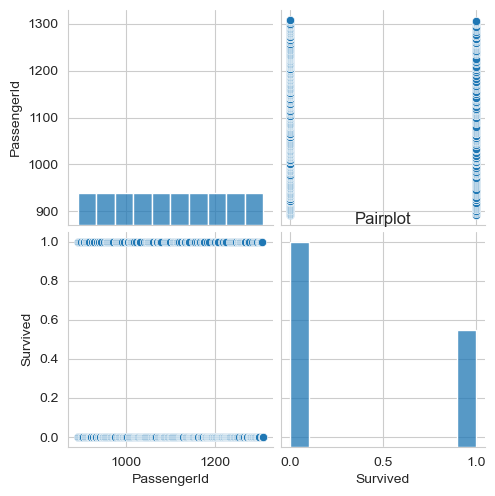

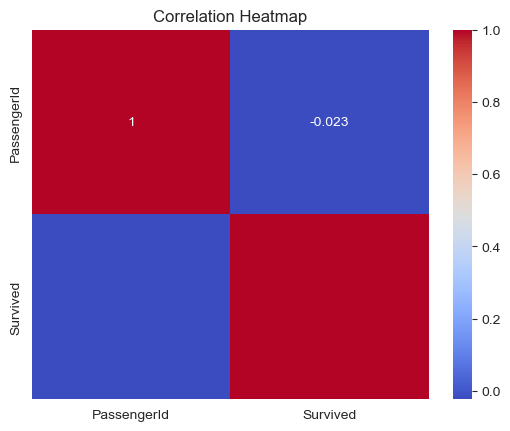

In [21]:
#Relationship between variables

# Pairplot
sns.pairplot(train)

plt.show()

# Correlation Heatmap (only for numeric columns)
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## ScatterPlots

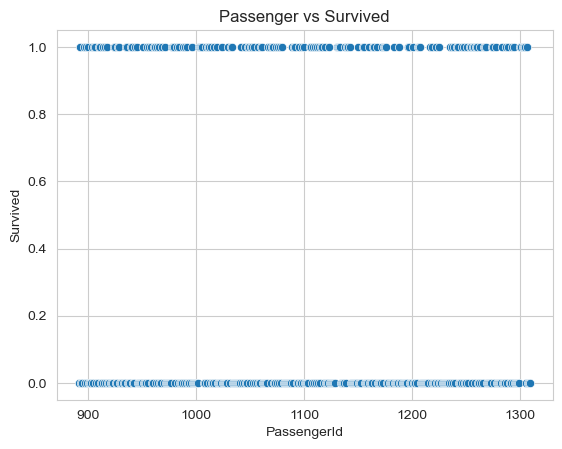

In [23]:
sns.scatterplot(x='PassengerId', y='Survived', data=train)
plt.title('Passenger vs Survived')
plt.show()


In [24]:
train.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
413,False,False
414,False,False
415,False,False
416,False,False


<Axes: >

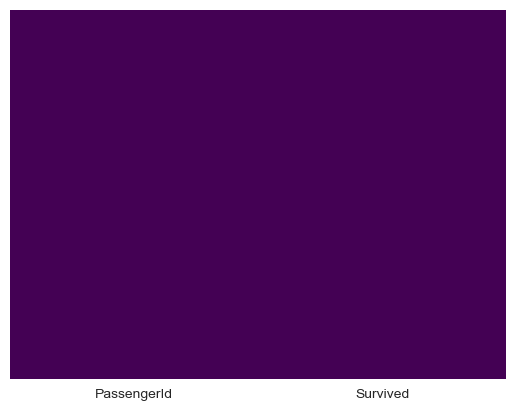

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<Axes: xlabel='Survived', ylabel='count'>

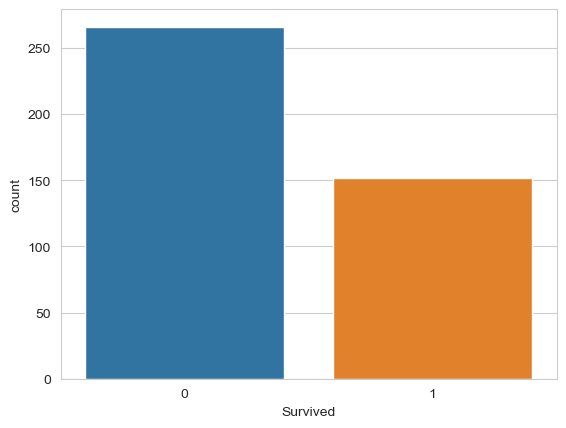

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

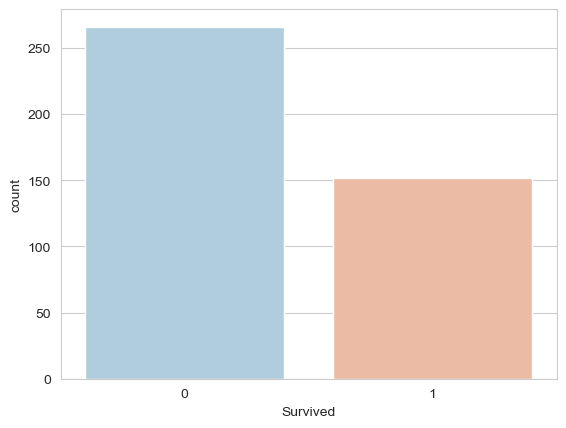

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


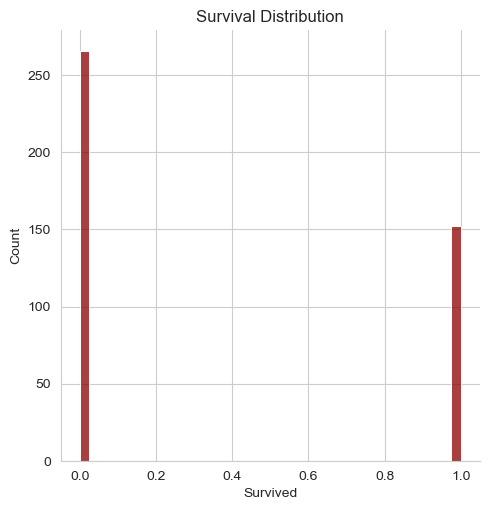

In [29]:
sns.displot(train['Survived'].dropna(), color='darkred', bins=40, kde=False)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

## Observations
- Most of the passengers did not survive.
- Passenger IDs are distributed uniformly.
- Passenger ID itself does not strongly correlate with survival (correlation close to 0).
- Scatterplot shows no clear pattern between Passenger ID and survival.
- No missing values in the dataset.


# Final Summary:

The dataset is clean and complete.
The survival rate is around one-third (because of how dummy data was created).
Passenger ID is just an identifier and does not impact survival.
More meaningful variables (like age, gender, class) would be needed for deeper analysis.
